# Finite difference approximations to time derivatives

In this notebook, we implement a first order Euler scheme for time marching in both explicit and semi-implicit forms for coupled stiff equations. 

Recall our pendulum thought experiment. We can describe the pendulum's motion by the system of first order ODES:

$$ \frac{d\omega}{dt} = -\frac{g}{l}sin(\theta) $$
$$ \frac{d\theta}{dt} = \omega $$

where $\omega$ is the angular velocity of the pendulum and $\theta$ is the angle of the pendulum's inertial axis relative to vertical. $l$ is the length of the pendulum arm and $g$ is acceleration due to gravity.  

Using a first order, explicit Euler scheme, we can discretize these equations:

$$ \theta_{n+1} = \theta_{n} + \omega_{n}\Delta t $$
$$ \omega_{n+1} = \omega_{n} + (-\frac{g}{l}sin(\theta_{n}))\Delta t $$ 

where $n+1$ and $n$ are $t+\Delta t$ and $t$, respectively, and $\Delta t$ is the timestep.

In [1]:
import numpy as np
import matplotlib.pyplot as plt

In [18]:
g = 9.81
l = 0.5

theta0 = np.pi/12
omega0 = 0

dt = 0.007
#dt = 0.07
N = 1500

# initialize arrays
t = np.zeros([N])
theta = np.zeros([N]) 
omega = np.zeros([N])
t[0] = 0
theta[0] = theta0
omega[0] = omega0

ti = t[0]
thetai = theta[0]
omegai = omega[0]

for i in range(1, N):
    # Advance the time node
    tn = ti+dt # the subscript n denotes (i+1) and the subscript i denotes (i) 
    
    # Solve for omega and theta
    # Fully explicit solution
    #thetan = thetai + omegai*dt
    #omegan = omegai + (-g/l*np.sin(thetai))*dt
    
    # Semi-implicit solution
    omegan = omegai + (-g/l*np.sin(thetai))*dt
    thetan = thetai + omegan*dt
    
    t[i] = tn
    theta[i] = thetan
    omega[i] = omegan
    
    # Reset for next loop
    ti = tn
    thetai = thetan
    omegai = omegan

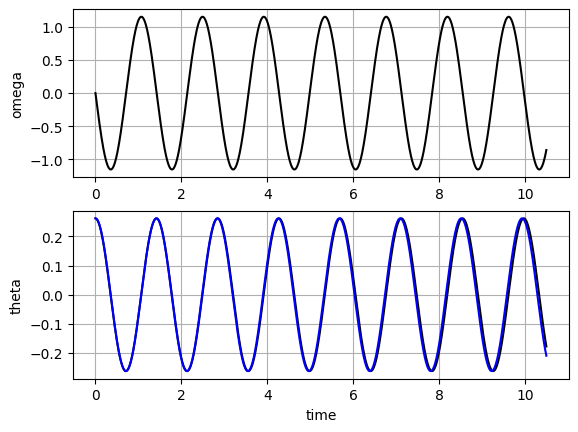

In [19]:
fig, ax = plt.subplots(2, 1)
ax[0].plot(t, omega, 'k')
ax[0].set_ylabel('omega')
ax[0].grid()
ax[1].plot(t, theta, 'k', label='numerical approximation')
ax[1].plot(t, theta0*np.cos(np.sqrt(g/l)*t), 'b', label='analytical solution')
ax[1].set_ylabel('theta')
ax[1].set_xlabel('time')
ax[1].grid()